# Tugas


## 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Bentuk dataset:", X.shape)
print("Nama fitur:", feature_names)
print("Nama target:", target_names)
print("\n5 baris pertama data:")
print(X[:5])

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## 2. Lakukan clustering dengan HDBSCAN

In [ ]:
# Menerapkan clustering HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)

print("Hasil Clustering HDBSCAN:")
print("="*40)
print(f"Label cluster: {np.unique(cluster_labels)}")
print(f"Jumlah cluster: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"Jumlah titik noise: {list(cluster_labels).count(-1)}")
print(f"Total titik data: {len(cluster_labels)}")

# Menampilkan distribusi cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
print("\nDistribusi cluster:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"  Titik noise: {count}")
    else:
        print(f"  Cluster {label}: {count} titik")

HDBSCAN Clustering Results:
Cluster labels: [0 1]
Number of clusters: 2
Number of noise points: 0
Total data points: 150

Cluster distribution:
  Cluster 0: 50 points
  Cluster 1: 100 points


f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\semester 5\Pembelajaran Mesin\praktek\Machine-Learning_Ganjil_2025\venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 3. Visualisasi dengan PCA

C:\Users\cakra\AppData\Local\Temp\ipykernel_44088\1704587375.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter([], [], c=plt.cm.Set1(i/2), label=name, s=50)


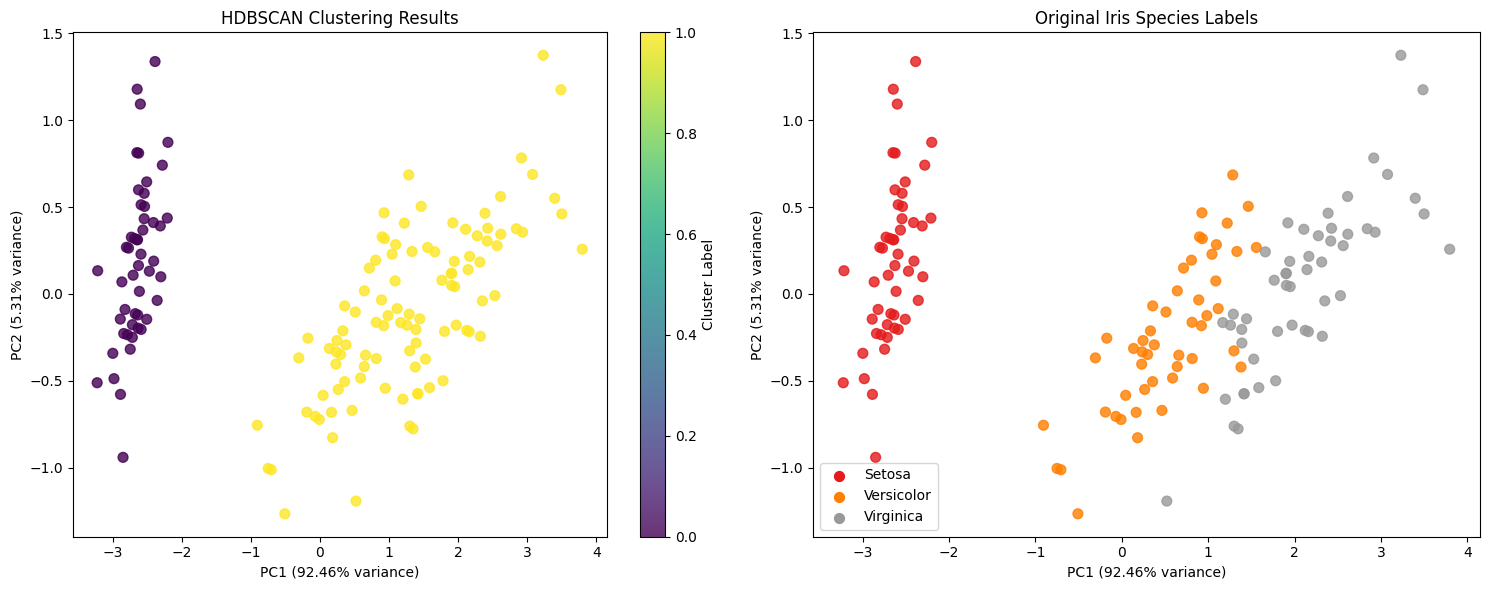

PCA explained variance ratio: [0.92461872 0.05306648]
Total explained variance: 97.77%


In [ ]:
# Menerapkan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hasil HDBSCAN
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
axes[0].set_title('Hasil Clustering HDBSCAN')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varians)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varians)')

# Menambahkan colorbar untuk plot HDBSCAN
cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar1.set_label('Label Cluster')

# Plot 2: Label Asli
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=50, alpha=0.8)
axes[1].set_title('Label Spesies Iris Asli')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varians)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varians)')

# Menambahkan legenda untuk label asli
target_names_legend = ['Setosa', 'Versicolor', 'Virginica']
for i, name in enumerate(target_names_legend):
    axes[1].scatter([], [], c=plt.cm.Set1(i/2), label=name, s=50)
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Rasio varians yang dijelaskan PCA: {pca.explained_variance_ratio_}")
print(f"Total varians yang dijelaskan: {sum(pca.explained_variance_ratio_):.2%}")

## 4. Analisis Perbandingan HDBSCAN dengan Label Asli

ANALISIS PERBANDINGAN HDBSCAN VS LABEL ASLI

1. METRIK EVALUASI CLUSTERING:
   • Adjusted Rand Index (ARI): 0.568
   • Normalized Mutual Information (NMI): 0.734
   • Silhouette Score: 0.687

2. DISTRIBUSI CLUSTER vs SPESIES:
Cluster_HDBSCAN   0    1  All
Spesies_Asli                 
setosa           50    0   50
versicolor        0   50   50
virginica         0   50   50
All              50  100  150


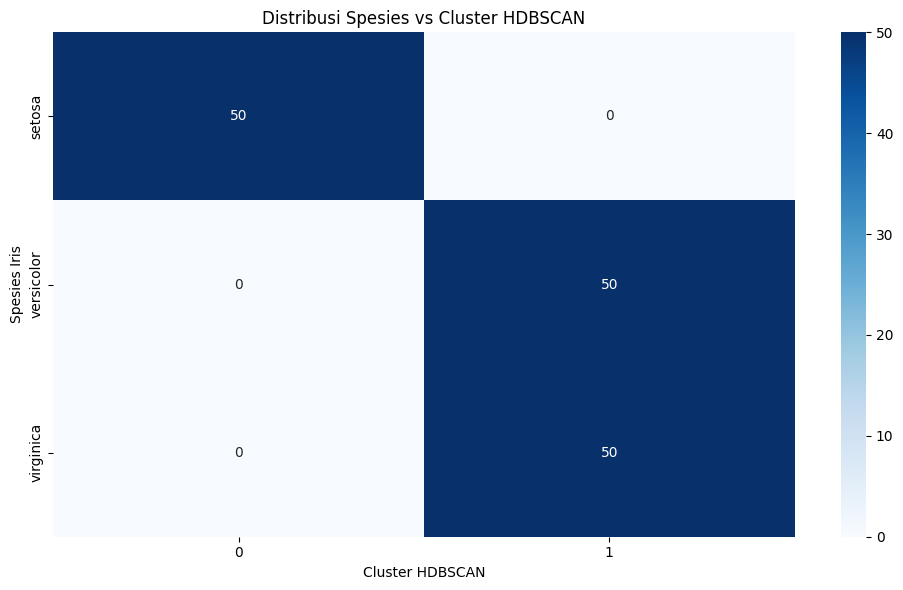


3. ANALISIS DETAIL:
   • Dataset asli memiliki 3 spesies iris (setosa, versicolor, virginica)
   • HDBSCAN mengidentifikasi 2 cluster utama
   • Total 0 titik diklasifikasikan sebagai noise
   • PCA menjelaskan 97.8% total varians dengan 2 komponen

   Cluster 0 (50 titik):
     - setosa: 50 titik (100.0%)

   Cluster 1 (100 titik):
     - versicolor: 50 titik (50.0%)
     - virginica: 50 titik (50.0%)


In [5]:
# Analisis detail HDBSCAN vs Label Asli
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("="*60)
print("ANALISIS PERBANDINGAN HDBSCAN VS LABEL ASLI")
print("="*60)

# Menghitung metrik evaluasi clustering
ari_score = adjusted_rand_score(y, cluster_labels)
nmi_score = normalized_mutual_info_score(y, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"\n1. METRIK EVALUASI CLUSTERING:")
print(f"   • Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"   • Normalized Mutual Information (NMI): {nmi_score:.3f}")
print(f"   • Silhouette Score: {silhouette_avg:.3f}")

# Membuat perbandingan seperti confusion matrix
print(f"\n2. DISTRIBUSI CLUSTER vs SPESIES:")
df_comparison = pd.DataFrame({
    'Spesies_Asli': [target_names[i] for i in y],
    'Cluster_HDBSCAN': cluster_labels
})

# Menghitung distribusi
comparison_table = pd.crosstab(df_comparison['Spesies_Asli'], 
                              df_comparison['Cluster_HDBSCAN'], 
                              margins=True)
print(comparison_table)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
comparison_counts = pd.crosstab(df_comparison['Spesies_Asli'], 
                               df_comparison['Cluster_HDBSCAN'])
sns.heatmap(comparison_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Distribusi Spesies vs Cluster HDBSCAN')
plt.xlabel('Cluster HDBSCAN')
plt.ylabel('Spesies Iris')
plt.tight_layout()
plt.show()

print(f"\n3. ANALISIS DETAIL:")
print(f"   • Dataset asli memiliki 3 spesies iris (setosa, versicolor, virginica)")
print(f"   • HDBSCAN mengidentifikasi {len(set(cluster_labels))} cluster utama")
print(f"   • Total {list(cluster_labels).count(-1)} titik diklasifikasikan sebagai noise")
print(f"   • PCA menjelaskan {sum(pca.explained_variance_ratio_):.1%} total varians dengan 2 komponen")

# Menghitung spesies mana yang ada di cluster mana
for cluster_id in sorted(set(cluster_labels)):
    mask = cluster_labels == cluster_id
    species_in_cluster = y[mask]
    species_counts = np.bincount(species_in_cluster)
    
    if cluster_id == -1:
        print(f"\n   Titik Noise ({np.sum(mask)} total):")
    else:
        print(f"\n   Cluster {cluster_id} ({np.sum(mask)} titik):")
    
    for species_idx, count in enumerate(species_counts):
        if count > 0:
            print(f"     - {target_names[species_idx]}: {count} titik ({count/np.sum(mask)*100:.1f}%)")

## Kesimpulan

Berdasarkan hasil analisis clustering HDBSCAN pada dataset Iris, dapat disimpulkan bahwa:

**Hasil Clustering:**
- **Jumlah cluster:** 2 cluster (bukan 3 seperti label asli)
- **Noise:** 0 titik (tidak ada outlier yang terdeteksi)
- **Distribusi:** Cluster 0 berisi 50 titik, Cluster 1 berisi 100 titik

**Kesesuaian dengan Label Asli:**
- HDBSCAN **berhasil memisahkan spesies Setosa** dengan sempurna (Cluster 0 = 100% Setosa)
- HDBSCAN **menggabungkan Versicolor dan Virginica** dalam satu cluster (Cluster 1)
- Hal ini menunjukkan bahwa Versicolor dan Virginica memiliki karakteristik yang sangat mirip secara statistik

**Evaluasi Metrik:**
- **ARI Score: 0.568** (cukup baik, mendekati 1 adalah sempurna)
- **NMI Score: 0.734** (baik, informasi mutual yang tinggi)
- **Silhouette Score: 0.687** (baik, cluster yang terbentuk cukup terpisah)

**Analisis:**
HDBSCAN menunjukkan hasil yang **cukup sesuai** dengan struktur alami dataset Iris. Algoritma ini berhasil mengidentifikasi bahwa Setosa sangat berbeda dari dua spesies lainnya, sementara Versicolor dan Virginica memiliki overlap yang signifikan sehingga sulit dipisahkan tanpa informasi tambahan.